In [4]:
import os
import sys
import time
import copy
from glob import glob
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

import cv2
from PIL import Image
import shutil

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

import skimage

# TensorFlow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, Adamax
from keras.metrics import categorical_crossentropy
from keras import regularizers
from keras.models import Model
from keras import backend as K

np.random.seed(222)

from IPython.display import YouTubeVideo
import albumentations as A

# Set environment settings and pandas display options
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Setting styles
sns.set_style('darkgrid')

# Warning settings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

print('All modules have been imported')

All modules have been imported


In [5]:
path='C:/Users/Manuel Marin/Desktop/myenv/archive_4/hmnist_28_28_RGB.csv'

In [6]:
df=pd.read_csv(path)

In [7]:
df.tail()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  \
10010        184        166        182        188        168        182   
10011        121        104        103        132        111        107   
10012        175        156        160        184        164        167   
10013        167        127        146        169        124        142   
10014        181        150        133        178        145        127   

       pixel0012  pixel0013  pixel0014  pixel0015  pixel0016  pixel0017  \
10010        181        157        162        205        179        188   
10011        130        108        104        136        112        111   
10012        195        173        175        210        191        199   
10013        173        134        149        177        139        156   
10014        177        144        122        177        146        123   

       pixel0018  pixel0019  pixel0020  pixel0021  pixel0022  pixel0023  \
10010        221        199        214        224        202        215   
10011        148        125        125        155        132        134   
10012        212        195        201        210        189        193   
10013        181        141        159        183        137        154   
10014        179        148        126        185        157        140   

       pixel0024  pixel0025  pixel0026  pixel0027  pixel0028  pixel0029  \
10010        226        201        205        223        198        206   
10011        157        132        132        164        138        137   
10012        218        194        203        217        191        195   
10013        185        139        160        185        145        165   
10014        177        142        113        174        138        112   

       pixel0030  pixel0031  pixel0032  pixel0033  pixel0034  pixel0035  \
10010        230        207        219        228        201        211   
10011        187        161        161        198        172        173   
10012        217        195        199        224        201        203   
10013        186        148        162        189        157        170   
10014        177        141        117        175        139        108   

       pixel0036  pixel0037  pixel0038  pixel0039  pixel0040  pixel0041  \
10010        229        203        210        223        196        197   
10011        202        175        175        209        182        184   
10012        236        211        215        250        228        233   
10013        190        155        169        191        151        162   
10014        178        145        117        181        150        129   

       pixel0042  pixel0043  pixel0044  pixel0045  pixel0046  pixel0047  \
10010        215        183        182        218        183        183   
10011        194        164        164        188        158        158   
10012        249        226        230        252        230        233   
10013        190        165        173        193        168        175   
10014        177        142        115        182        150        123   

       pixel0048  pixel0049  pixel0050  pixel0051  pixel0052  pixel0053  \
10010        220        186        190        219        184        192   
10011        204        178        183        201        176        176   
10012        251        226        231        244        215        220   
10013        196        169        174        196        176        181   
10014        182        

In [8]:
fractions = np.array([0.8,0.2])
df = df.sample(frac = 1)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [34]:
print(len(train_set))
print(len(test_set))
df.label.unique()

8012
2003


array([2, 4, 1, 6, 0, 5, 3], dtype=int64)

In [12]:
classes = { 0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
            1:('bcc' , 'basal cell carcinoma'),
            2:('bkl', 'benign keratosis-like lesions'),
            3:('df', 'dermatofibroma'),
            4:('nv', ' melanocytic nevi'),
            5:('vasc', ' pyogenic granulomas and hemorrhage'),
            6:('mel', 'melanoma'),}

In [43]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

columns = list(x_train)
print(columns)

['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004', 'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009', 'pixel0010', 'pixel0011', 'pixel0012', 'pixel0013', 'pixel0014', 'pixel0015', 'pixel0016', 'pixel0017', 'pixel0018', 'pixel0019', 'pixel0020', 'pixel0021', 'pixel0022', 'pixel0023', 'pixel0024', 'pixel0025', 'pixel0026', 'pixel0027', 'pixel0028', 'pixel0029', 'pixel0030', 'pixel0031', 'pixel0032', 'pixel0033', 'pixel0034', 'pixel0035', 'pixel0036', 'pixel0037', 'pixel0038', 'pixel0039', 'pixel0040', 'pixel0041', 'pixel0042', 'pixel0043', 'pixel0044', 'pixel0045', 'pixel0046', 'pixel0047', 'pixel0048', 'pixel0049', 'pixel0050', 'pixel0051', 'pixel0052', 'pixel0053', 'pixel0054', 'pixel0055', 'pixel0056', 'pixel0057', 'pixel0058', 'pixel0059', 'pixel0060', 'pixel0061', 'pixel0062', 'pixel0063', 'pixel0064', 'pixel0065', 'pixel0066', 'pixel0067', 'pixel0068', 'pixel0069', 'pixel0070', 'pixel0071', 'pixel0072', 'pixel0073', 'pixel0074', 'pixel0075', 'pixel0076'

<Axes: ylabel='count'>

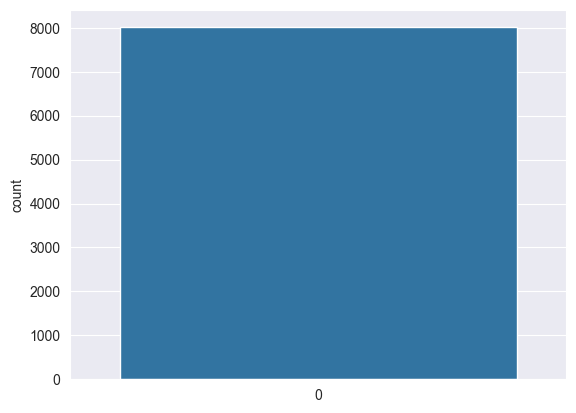

In [44]:
import seaborn as sns

sns.countplot(train_set['label'])

7
Class 2 count: 5362
Class 4 count: 5362
Class 1 count: 5362
Class 6 count: 5362
Class 0 count: 5362
Class 5 count: 5362
Class 3 count: 5362


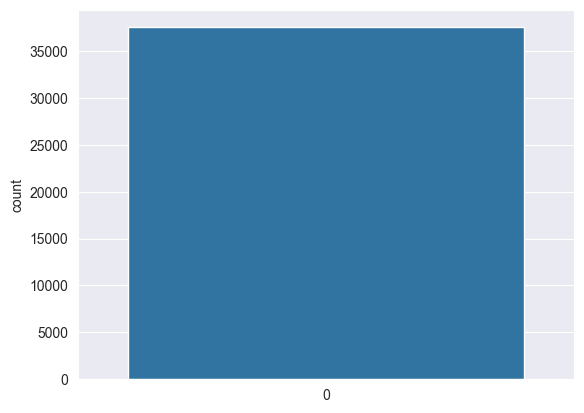

In [71]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)
sns.countplot(y_train)

# Assuming y_train is a Pandas Series
unique_classes = y_train.unique()  # Get the unique classes in y_train
print(len(unique_classes))
for cls in unique_classes:
    class_count = (y_train == cls).sum()
    print(f"Class {cls} count: {class_count}")



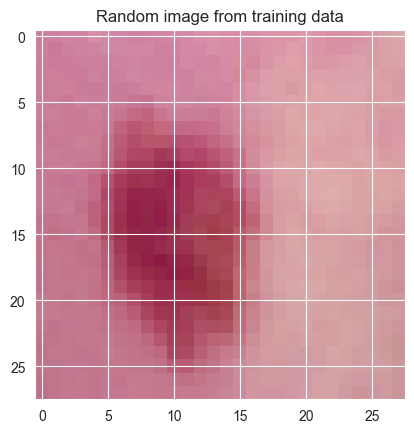

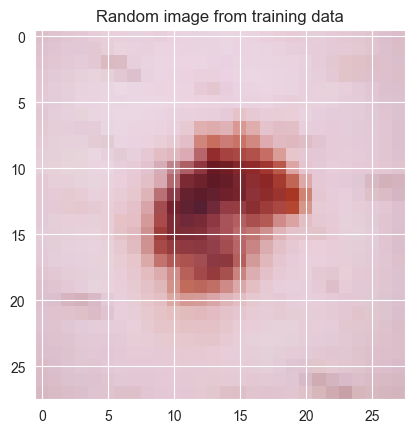

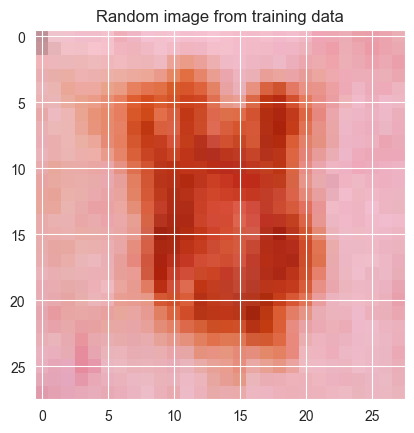

In [37]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
#https://keras.io/api/models/sequential/
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/merging_layers/add/
%time 

model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(Dense(7,activation='softmax'))

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 

In [19]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_best.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [20]:
%time 

model.compile(Adamax(learning_rate= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])


CPU times: total: 0 ns
Wall time: 0 ns


In [21]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

start_time = datetime.now()
checkpoint = ModelCheckpoint("./my_model1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    shuffle=True,
                    callbacks=[callback,checkpoint,early_stop])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/20


KeyboardInterrupt: 

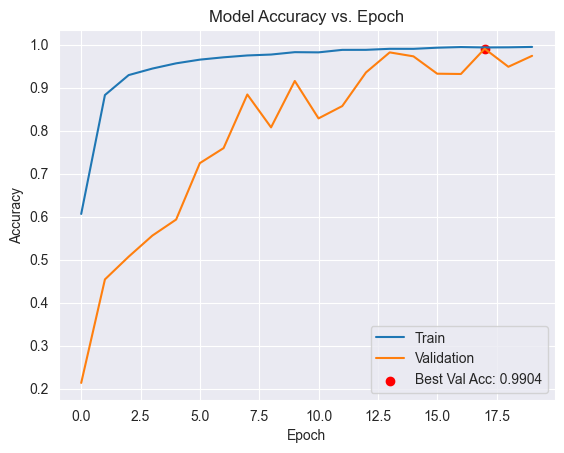

In [ ]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_accuracy = history.history['val_accuracy'][best_epoch]

# Mark the best validation accuracy point with a red dot
plt.scatter(best_epoch, best_val_accuracy, color='red', marker='o', label=f'Best Val Acc: {best_val_accuracy:.4f}')

plt.title('Model Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

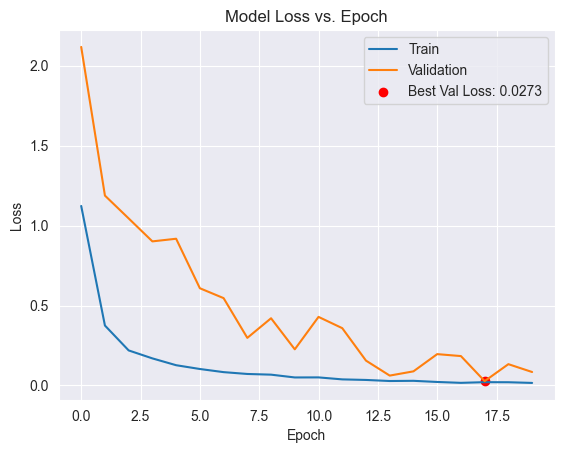

In [ ]:
# Plot loss vs epoch
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')

# Find the epoch with the lowest validation loss
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]

# Mark the best validation loss point with a red dot
plt.scatter(best_epoch, best_val_loss, color='red', marker='o', label=f'Best Val Loss: {best_val_loss:.4f}')

plt.title('Model Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('Skin Cancer1.h5')

63/63 [==============================] - 1s 16ms/step


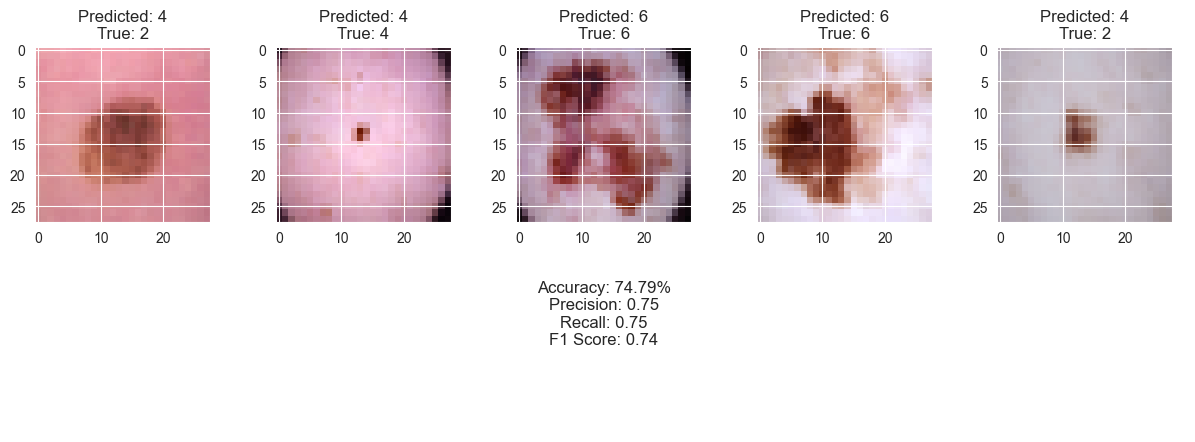

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Reshape x_test if needed
x_test = np.array(x_test).reshape(-1, 28, 28, 3)

model = keras.models.load_model('C:/Users/Manuel Marin/Desktop/myenv/src/my_model1.h5')

# Get model predictions for the test data
predictions = model.predict(x_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, np.argmax(predictions, axis=1))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, np.argmax(predictions, axis=1), average='weighted')
recall = recall_score(y_test, np.argmax(predictions, axis=1), average='weighted')
f1 = f1_score(y_test, np.argmax(predictions, axis=1), average='weighted')
num_images_to_display = 5
# Display some test images and the evaluation metrics
plt.figure(figsize=(15, 5))
for i in range(5):  # Display 5 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])  # Get the predicted label
    true_label = y_test.iloc[i]  # Get the true label directly from y_test
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')

# Display the evaluation metrics
plt.subplot(2, 1, 2)
plt.axis('off')
plt.text(0.5, 0.5,
         f'Accuracy: {accuracy:.2%}\n'
         f'Precision: {precision:.2f}\n'
         f'Recall: {recall:.2f}\n'
         f'F1 Score: {f1:.2f}',
         fontsize=12,
         ha='center')
plt.show()

<Figure size 800x600 with 0 Axes>

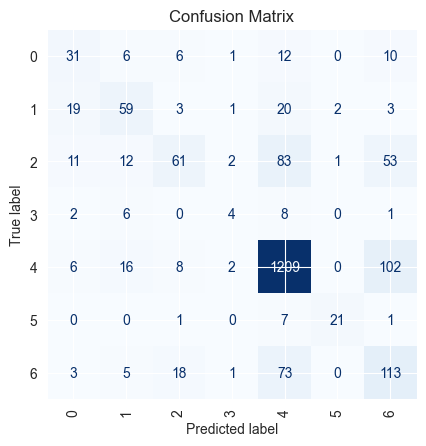

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        66
           1       0.57      0.55      0.56       107
           2       0.63      0.27      0.38       223
           3       0.36      0.19      0.25        21
           4       0.86      0.90      0.88      1343
           5       0.88      0.70      0.78        30
           6       0.40      0.53      0.46       213

    accuracy                           0.75      2003
   macro avg       0.59      0.52      0.54      2003
weighted avg       0.75      0.75      0.74      2003



In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels (assuming y_test is not one-hot encoded)
true_labels = y_test

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix with a plain white background and black text
plt.figure(figsize=(8, 6))
display = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
display.plot(cmap='Blues', xticks_rotation='vertical', colorbar=False)
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)
